In [2]:
from ssqueezepy import cwt, ssq_cwt
from MyEDFImports import load_all_data, load_all_labels
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = load_all_data()


Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/WD224010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VP214110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VC209100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(261, 10000)


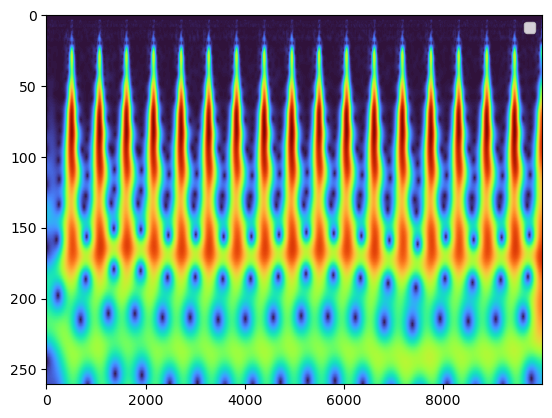

In [4]:
one_instance = data[5000]
# this is linear scale so this is bad i guess?
lin_scale  = np.arange(1,262,dtype=np.float32)
coef, lin_scale_back = cwt(one_instance, wavelet='morlet', scales=lin_scale)
print(coef.shape)
plt.imshow(np.abs(coef),aspect='auto', cmap='turbo')
plt.legend()

In [5]:
np.all(lin_scale == lin_scale)

True

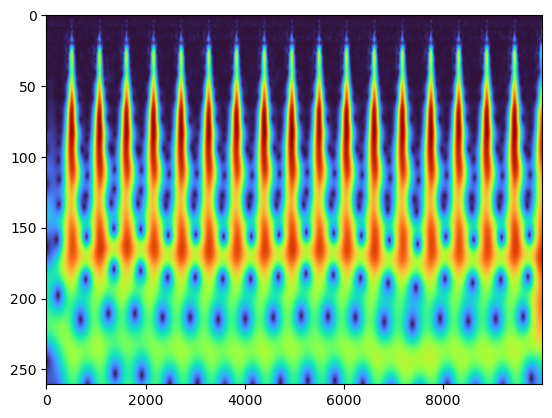

In [6]:
# this is automatic and gives us some logarithmic shape of scales - alot of them for low scales few ?
coef_auto, scales_auto = cwt(one_instance, wavelet='morlet')
plt.imshow(np.abs(coef),aspect='auto', cmap='turbo')


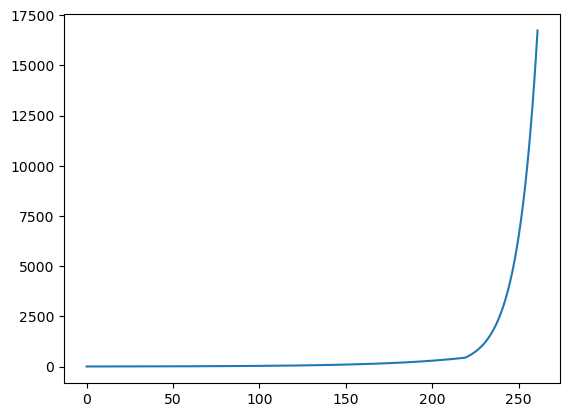

In [7]:
plt.plot(scales_auto)

(261, 10000)


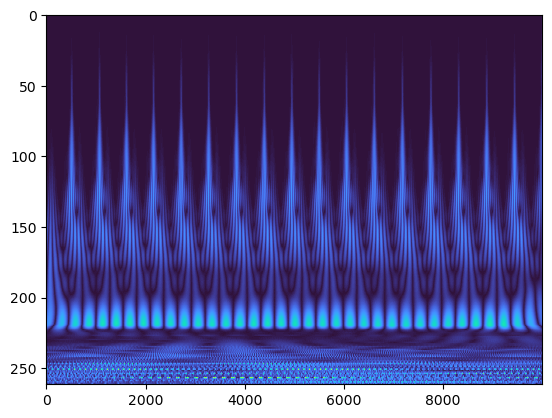

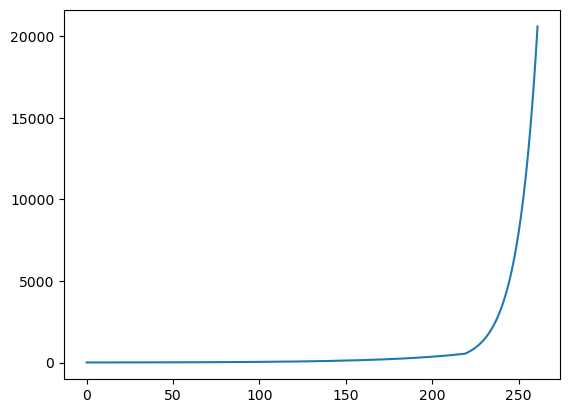

In [8]:
import pywt

coef_pywt, freq = pywt.cwt(one_instance, wavelet='morl', scales=scales_auto)
print(coef.shape)
plt.imshow(np.abs(coef_pywt), aspect='auto', cmap='turbo')
plt.show()
# plt.imshow(coef),aspect='auto', cmap='turbo')
# plt.show()
plt.plot(1. / freq)

(261, 10000)


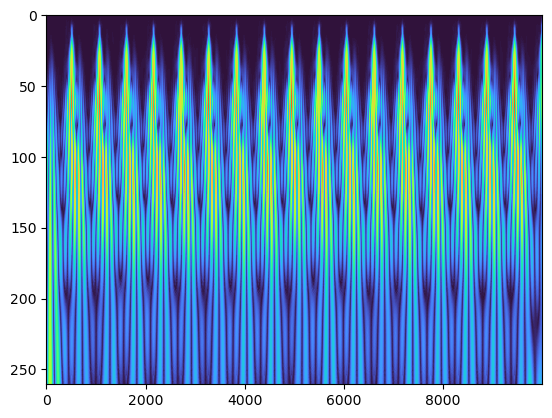

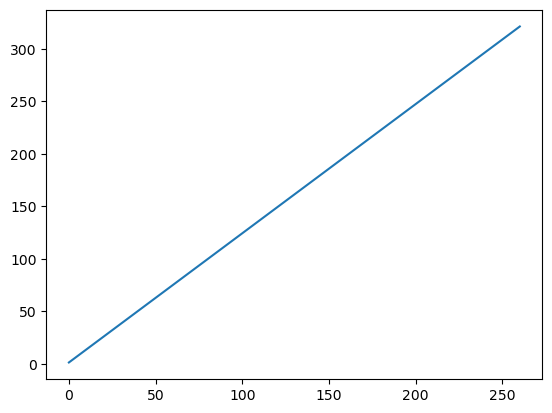

In [9]:
coef_pywt, freq = pywt.cwt(one_instance, wavelet='morl', scales=lin_scale)
print(coef.shape)
plt.imshow(np.abs(coef_pywt), aspect='auto', cmap='turbo')
plt.show()
# plt.imshow(coef),aspect='auto', cmap='turbo')
# plt.show()
plt.plot(1. / freq)


(261, 10000)


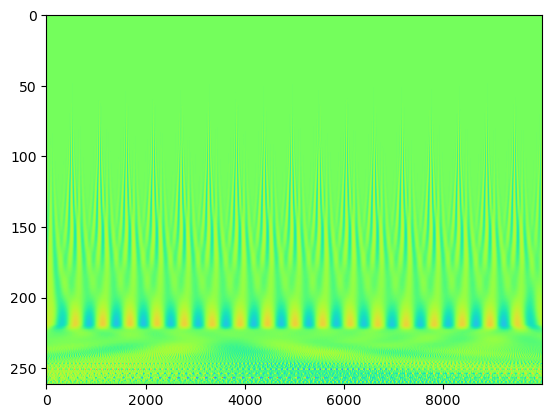

In [10]:
import pywt
coef_pywt,freq = pywt.cwt(one_instance, wavelet='morl', scales=scales_auto)
print(coef.shape)
plt.imshow(coef_pywt,aspect='auto', cmap='turbo')
plt.show()
# plt.imshow(coef),aspect='auto', cmap='turbo')
# plt.show()

(262, 10000)


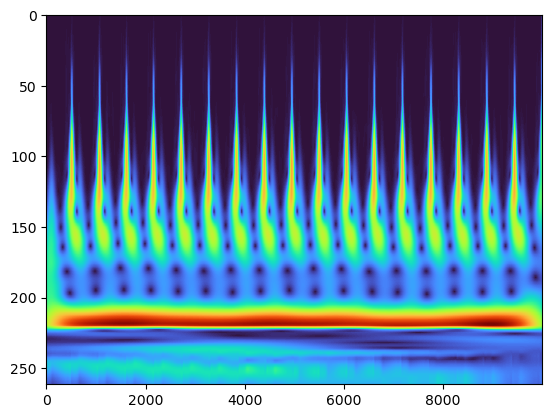

In [15]:
import scipy.signal as sig
coef_scipy = sig.cwt(one_instance, sig.morlet2, scales_auto)
print(coef_scipy.shape)
plt.imshow(np.abs(coef_scipy),aspect='auto', cmap='turbo')
plt.show()

(261, 10000)


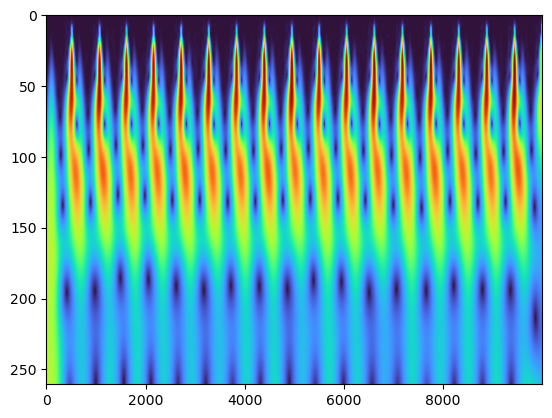

In [16]:
# plt.show()
import scipy.signal as sig

coef_scipy = sig.cwt(one_instance, sig.morlet2, lin_scale)
print(coef_scipy.shape)
plt.imshow(np.abs(coef_scipy), aspect='auto', cmap='turbo')
plt.show()

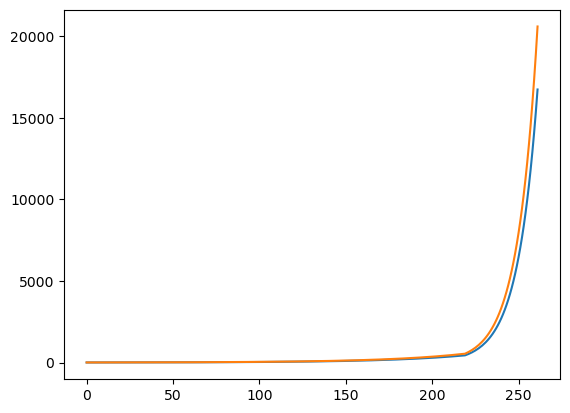

In [12]:
plt.plot(scales_auto)
plt.plot(1./freq)


ValueError: operands could not be broadcast together with shapes (262,10000) (261,10000) 

In [ ]:
plt.imshow(np.abs(coef),aspect='auto', cmap='turbo')


In [20]:
sig.morlet

<function scipy.signal._wavelets.morlet(M, w=5.0, s=1.0, complete=True)>

In [ ]:
import